# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1353.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           7.53e-45
Time:                        06:51:34   Log-Likelihood:                 9.2333
No. Observations:                  50   AIC:                            -10.47
Df Residuals:                      46   BIC:                            -2.818
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9077      0.071     68.652      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.37860807  4.86941945  5.3208846   5.70601499  6.00756216  6.22085149
  6.35455029  6.42924376  6.47405292  6.52185006  6.60385799  6.74452017
  6.95748471  7.24336207  7.58962472  7.97266541  8.36167575  8.72370795
  9.02908805  9.25629127  9.39547846  9.45011268  9.43639015  9.38057936
  9.31470514  9.27128714  9.2779969   9.3531115   9.50251071  9.71871094
  9.98209478 10.26413409 10.53207707 10.75432932 10.90564469 10.97127316
 10.94938421 10.85136759 10.69996201 10.52551924 10.36101737 10.23664264
 10.17482992 10.1865767  10.26963625 10.40888677 10.57881582 10.74771197
 10.88287489 10.95598792]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5,25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n-5)**2))
Xnew = sm.add_constant(Xnew)
ynewpred =  olsres.predict(Xnew) # predict out of sample
print(ynewpred)

[10.93372496 10.78001952 10.51429186 10.18079828  9.83779567  9.54327813
  9.34077806  9.24870787  9.25585197  9.32411278]


## Plot comparison

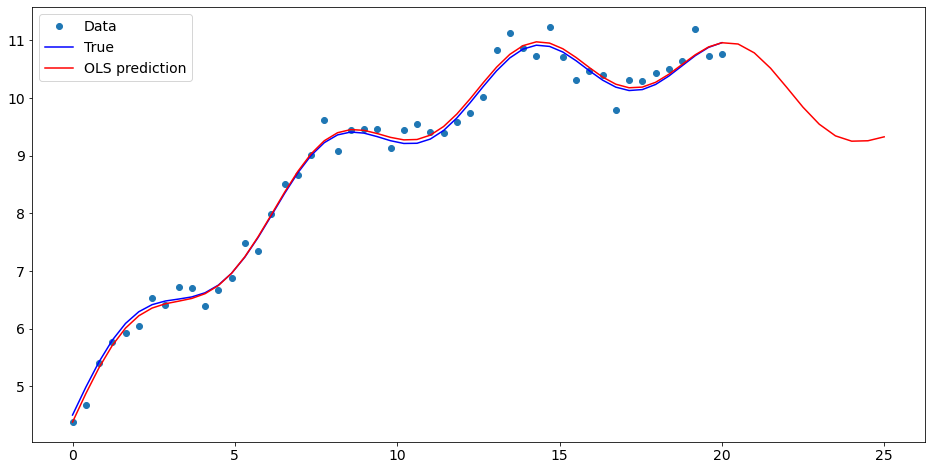

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1" : x1, "y" : y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.907719
x1                  0.517908
np.sin(x1)          0.495210
I((x1 - 5) ** 2)   -0.021164
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.933725
1    10.780020
2    10.514292
3    10.180798
4     9.837796
5     9.543278
6     9.340778
7     9.248708
8     9.255852
9     9.324113
dtype: float64